<a href="https://colab.research.google.com/github/hugh0329/hugh0329/blob/main/TensorFlow_%EC%B4%88%EB%B3%B4%EC%9E%90_%EA%B8%B0%EB%B3%B8%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

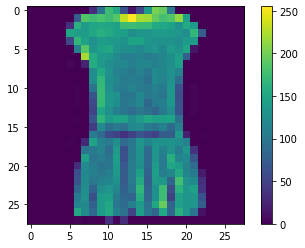

In [6]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

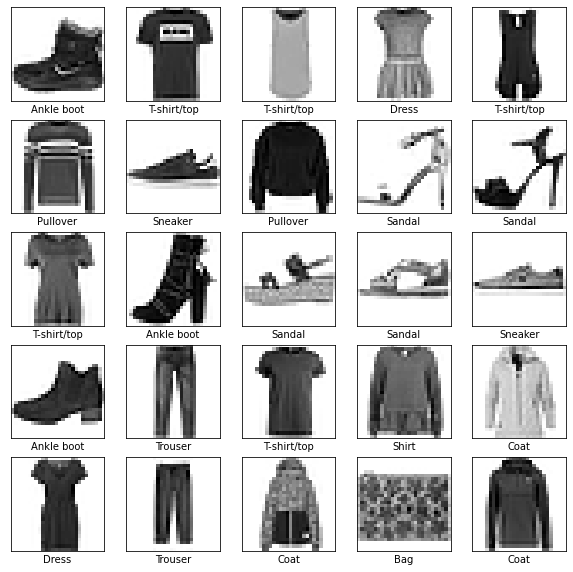

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),  input_shape=(28,28,1)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10)
]
)

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=100,batch_size=64)

Epoch 1/100
938/938 [==============================] - 6s 6ms/step - loss: 0.1994 - accuracy: 0.9259
Epoch 2/100
938/938 [==============================] - 6s 6ms/step - loss: 0.1717 - accuracy: 0.9362
Epoch 3/100
938/938 [==============================] - 6s 6ms/step - loss: 0.1583 - accuracy: 0.9417
Epoch 4/100
938/938 [==============================] - 6s 6ms/step - loss: 0.1439 - accuracy: 0.9460
Epoch 5/100
938/938 [==============================] - 6s 6ms/step - loss: 0.1328 - accuracy: 0.9494
Epoch 6/100
938/938 [==============================] - 6s 6ms/step - loss: 0.1169 - accuracy: 0.9563
Epoch 7/100
938/938 [==============================] - 6s 6ms/step - loss: 0.1046 - accuracy: 0.9617
Epoch 8/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0965 - accuracy: 0.9642
Epoch 9/100
938/938 [==============================] - 6s 7ms/step - loss: 0.0932 - accuracy: 0.9654
Epoch 10/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0858 - accura

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy : ', test_acc)

313/313 - 0s - loss: 0.3231 - accuracy: 0.8851 - 424ms/epoch - 1ms/step

Test accuracy :  0.8851000070571899


In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [21]:
def plot_images(i, predictions_array, true_label, img):
  true_label, img = true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_valuse_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array,color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

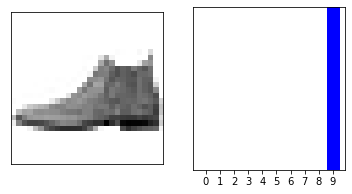

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_valuse_array(i, predictions[i], test_labels)
plt.show()  

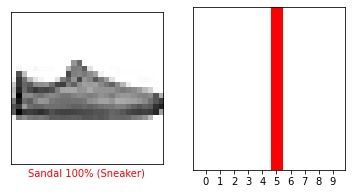

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_valuse_array(i, predictions[i], test_labels)
plt.show()

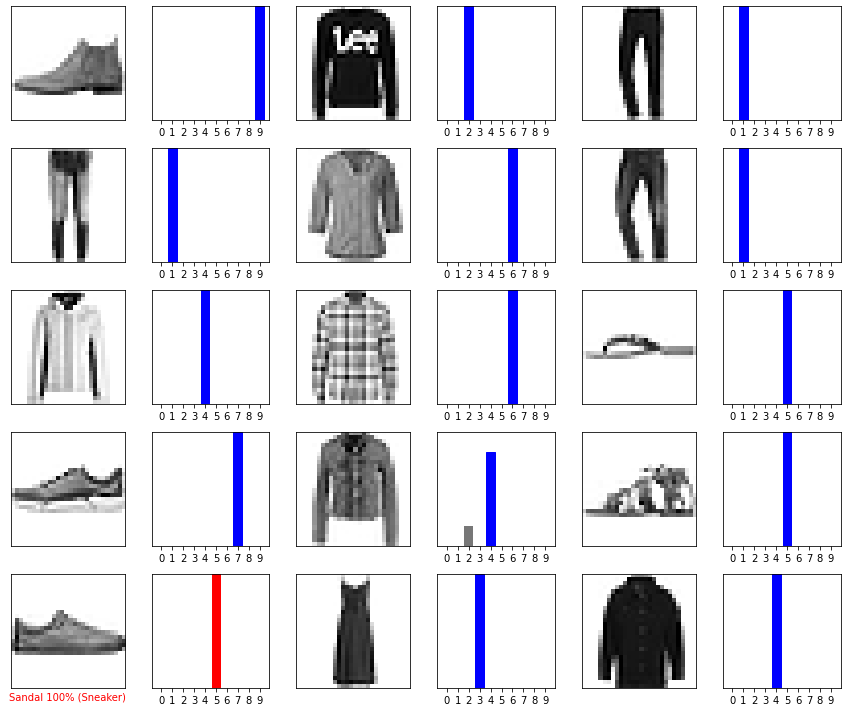

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_images(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_valuse_array(i, predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [28]:
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


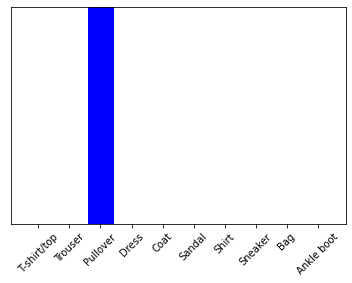

In [32]:
plot_valuse_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [33]:
np.argmax(predictions_single[0])

2